# DATA V2 Projet 4 OpenClassRoom
## Analyses des données
### import des bibliotheques et des fichiers

In [1]:
#import des bibliotheques
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 

In [2]:
from fonction.fonction_perso import *

In [3]:
#importation des csv dans des dataframes et données exterieures
pop_nutri_aide = pd.read_csv('donnee_analyse/pop_nutri_aide.csv')
pop_dispo = pd.read_csv('donnee_analyse/pop_dispo.csv')
nom_cereale = pd.read_csv('donnee_analyse/cereale.csv')

# données extérieures : une personne a besoin de 2500 Kcal
# src : https://www.ciwf.fr/actualites/2013/07/nourrir-9-milliards-habitants
calorie_necessaire = 2500

### Question 1: proportion de personne en état de sous-nutrition en 2017

la proportion de personne en état de sous-nutrition est de : 7.1 %


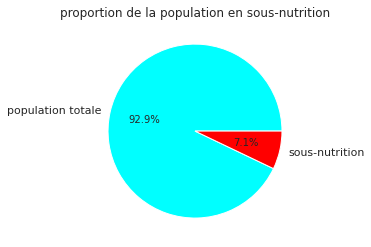

In [4]:
#filtrage de l'année
Q1 = pop_nutri_aide.loc[(pop_nutri_aide['Année'] == 2017)] 

#somme des colonnes enregistrées dans des variables
pop_sousnutri_totale = Q1['Sous_nutrition en nbr d habitant'].sum()
pop_totale = Q1['Population en nbr d habitant'].sum()

#la reponse en mode texte:
print("la proportion de personne en état de sous-nutrition est de :",
      round(pop_sousnutri_totale/pop_totale*100,2),"%")

#camembert avec matplotlib pyplot
sns.set_theme(style="dark", color_codes=True)

plt.title(label='proportion de la population en sous-nutrition')
plt.pie([pop_totale-pop_sousnutri_totale,pop_sousnutri_totale],normalize=True,
        labels=['population totale','sous-nutrition'],autopct="%1.1f%%",colors=['cyan','red']);


### Question 2: Le nombre théorique de personnes qui pourraient être nourries en 2017

In [5]:
#ne prendre que les 2 colonnes dispo-alimentaire et Population
Q2 = pop_dispo.iloc[:,[5,19]].copy(deep=True) 

#création nouvelle colonne avec le nombre de Kcal dispo 
Q2['dispo_alimentaire'] = Q2['Disponibilité alimentaire (Kcal/personne/jour)']*Q2['Population en nbr d habitant']

# calcul et enregistrement dans des variables
dispo_alim_totale = Q2['dispo_alimentaire'].sum()
nourriture_par_personne = dispo_alim_totale/calorie_necessaire
prop_prod = int(nourriture_par_personne/(pop_totale)*100)

#affichage de la reponse en mode terminal
print("on pourrait nourrir ",int(nourriture_par_personne),"personnes")
print("on produit",int(prop_prod),"% de la population totale" ) 

on pourrait nourrir  8367593850 personnes
on produit 110 % de la population totale


### Question 3: idem pour la disponibilté alimentaire des produits végétaux

In [6]:
#tableaux avec seulement les données necessaires à la question
Q3 = pop_dispo.iloc[:,[2,5,19]].copy(deep=True) 

#on enleve la nourriture d'origine animale
Q3= Q3[Q3['Origine'] == 'vegetale']

#création d'une colonne dispo alimentaire
Q3['dispo_alimentaire'] = Q3['Disponibilité alimentaire (Kcal/personne/jour)']*Q3['Population en nbr d habitant']

#calcul et enregistrement dans les variables
dispo_alim_vegetale = Q3['dispo_alimentaire'].sum()
nourriture_par_personne_vegan = dispo_alim_vegetale/calorie_necessaire
prop_prod_vegan = int(nourriture_par_personne_vegan/(pop_totale)*100)

#affichage en mode texte
print("on pourrait nourrir ",int(nourriture_par_personne_vegan),"personnes")
print("on produit",int(prop_prod_vegan),"% de l'alimentation nécessaire à la population totale'" ) 

on pourrait nourrir  6904305684 personnes
on produit 91 % de l'alimentation nécessaire à la population totale'


### Création d'un diagramme avec les questions 2 et 3

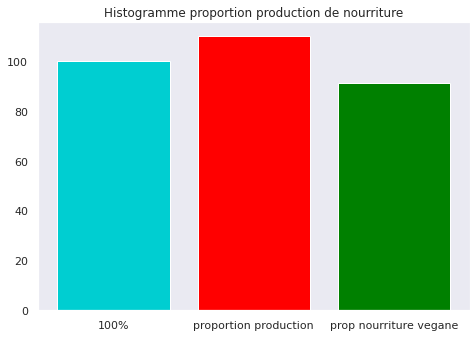

In [7]:
# Préparation de la figure
sns.set_theme(style="dark", color_codes=True)


fig = plt.figure()
ax = fig.add_axes([0, 0, 1,1])

etiquettes = ['100%', 'proportion production', 'prop nourriture vegane']
valeurs = [100, prop_prod, prop_prod_vegan]
couleurs = ['darkturquoise','red','green']

# Affichage des données
ax.bar(etiquettes, valeurs,color=couleurs)
# Titre du graphique
plt.title("Histogramme proportion production de nourriture") ; 



### question 4 :l’utilisation de la disponibilité intérieure, 
#### en particulier la part qui est attribuée à l’alimentation animale, celle qui est perdue et celle qui est concrètement utilisée pour l'alimentation humaine. Ajouter la part de la population humaine

In [20]:
#création et calcul d'un dataframe Q4
disponibilité_int_totale = pop_dispo['Disponibilité intérieure'].sum()
Q4 = pd.DataFrame(pop_dispo.iloc[:,[3,4,12,13,15,16]].sum())
Q4 = round(Q4 / disponibilité_int_totale *100,2)

#affichage en mode texte
print("la part de nourriture perdue est de :",Q4.iat[3,0],"%")
print("la part de nourriture mangée par les animaux est de :",Q4.iat[0,0],"%")
print("la part de nourriture mangée par les humains est de :",Q4.iat[2,0],"%")

#affichage de Q4
Q4.head(10)

la part de nourriture perdue est de : 4.65 %
la part de nourriture mangée par les animaux est de : 13.23 %
la part de nourriture mangée par les humains est de : 49.37 %


,0
Aliments pour animaux,13.23
Autres Utilisations,8.82
Nourriture,49.37
Pertes,4.65
Semences,1.58
Traitement,22.45


### histogramme Question 4 

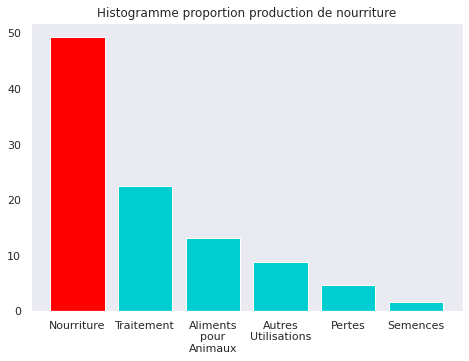

In [9]:
#trier le data avant 
Q4 = Q4.sort_values(by = 0,ascending= False)
sns.set_theme(style="dark", color_codes=True)

# Préparation de la figure
fig = plt.figure() #creation objet figure

ax = fig.add_axes([0, 0, 1,1]) #creation de l'objet axe dans figure

etiquettes = ['Nourriture','Traitement','Aliments\npour\nAnimaux','Autres\nUtilisations','Pertes','Semences']
valeurs = [Q4.iat[0,0],Q4.iat[1,0],Q4.iat[2,0],Q4.iat[3,0],Q4.iat[4,0],Q4.iat[5,0]]
couleurs = ['red','darkturquoise','darkturquoise','darkturquoise','darkturquoise','darkturquoise']

# Affichage des données
ax.bar(etiquettes, valeurs,color=couleurs) #application methode bar

# Titre du graphique
plt.title("Histogramme proportion production de nourriture") ; 

### Question 5: les pays où la proportion de personnes sous-alimentées est la plus forte en 2017

In [10]:
#filtrage de l'année
Q5 = pop_nutri_aide.loc[(pop_nutri_aide['Année'] == 2017)].copy(deep=True) 

#calcul
Q5['proportion'] = Q5['Sous_nutrition en nbr d habitant']/Q5['Population en nbr d habitant']*100

#affichage des 10 premiers et tri
Q5.sort_values(by='proportion',ascending=False).head(10)


,Zone,Année,Population en nbr d habitant,Sous_nutrition en nbr d habitant,Aide,proportion
472,Haïti,2017,10982366.0,5300000.0,NaN,48.259182
946,République populaire démocratique de Corée,2017,25429825.0,12000000.0,NaN,47.188685
652,Madagascar,2017,25570512.0,10500000.0,NaN,41.062924
622,Libéria,2017,4702226.0,1800000.0,NaN,38.279742
604,Lesotho,2017,2091534.0,800000.0,NaN,38.249438
1102,Tchad,2017,15016753.0,5700000.0,NaN,37.957606
970,Rwanda,2017,11980961.0,4200000.0,NaN,35.055619
730,Mozambique,2017,28649018.0,9400000.0,NaN,32.810898
1120,Timor-Leste,2017,1243258.0,400000.0,NaN,32.173531
4,Afghanistan,2017,36296113.0,10500000.0,NaN,28.928718


### Question 6 : ceux qui ont le plus bénéficié d'aide depuis 2013

In [11]:
# pour info:
help(Q6conv)

#la somme par pays des aides données depuis 2013
Q6 = pop_nutri_aide.groupby(['Zone'])['Aide'].agg('sum')
Q6 = Q6.map(Q6conv)

#affichage et classement

print('les valeurs sont en million de tonnes')
Q6.sort_values(ascending=False).head(10) 

Help on function Q6conv in module fonction.fonction_perso:

Q6conv(valeur)
    retourne une valeur divisée par 1000
    Parameters:
        valeur:float
        
    Returns:
        valeur*1000:float

les valeurs sont en million de tonnes


Zone
République arabe syrienne           1858.943
Éthiopie                            1381.294
Yémen                               1206.484
Soudan du Sud                        695.248
Soudan                               669.784
Kenya                                552.836
Bangladesh                           348.188
Somalie                              292.678
République démocratique du Congo     288.502
Niger                                276.344
Name: Aide, dtype: float64

### question 7: ceux ayant le moins et le plus de disponibilité/habitant
#### Affichage des pays ayant le moins de disponibilité par habitant

In [12]:
#affichage des 10 premiers et calculs
pop_dispo.groupby(['Zone'])['Disponibilité alimentaire (Kcal/personne/jour)'].agg('sum').sort_values().head(10)


Zone
République centrafricaine                     1879.0
Zambie                                        1924.0
Madagascar                                    2056.0
Afghanistan                                   2087.0
Haïti                                         2089.0
République populaire démocratique de Corée    2093.0
Tchad                                         2109.0
Zimbabwe                                      2113.0
Ouganda                                       2126.0
Timor-Leste                                   2129.0
Name: Disponibilité alimentaire (Kcal/personne/jour), dtype: float64

#### Affichage des pays ayant le plus de disponibilité par habitant

In [13]:
#affichage des 10 derniers et calculs
pop_dispo.groupby(['Zone'])['Disponibilité alimentaire (Kcal/personne/jour)'].agg('sum').sort_values().tail(10)

Zone
Allemagne                3503.0
Égypte                   3518.0
Luxembourg               3540.0
Italie                   3578.0
Irlande                  3602.0
Israël                   3610.0
États-Unis d'Amérique    3682.0
Turquie                  3708.0
Belgique                 3737.0
Autriche                 3770.0
Name: Disponibilité alimentaire (Kcal/personne/jour), dtype: float64

### Question 8 : utilisations des céréales

la part de consommation animale est de : 803.962 million de tonne.
la part de consommation humaine est de 615.286 million de tonne.


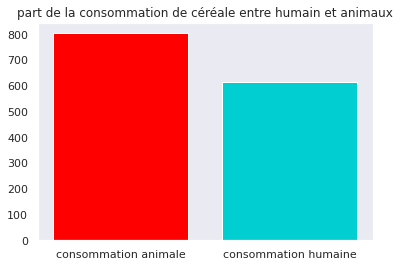

In [14]:
#filtrage pour n'avoir que les cereales 
Q8 = pop_dispo[pop_dispo.Produit.isin(nom_cereale['cereale'])]

#consommation animale
conso_animaux = Q6conv(Q8['Aliments pour animaux'].sum())

#consommation humaine
conso_humaine = Q6conv(Q8['Nourriture'].sum())

#affichage
print("la part de consommation animale est de :",conso_animaux,"million de tonne.")
print("la part de consommation humaine est de",conso_humaine,"million de tonne.")

#un autre graph

plt.title(label='part de la consommation de céréale entre humain et animaux')
plt.bar(1,conso_animaux,color = 'red')
plt.bar(2,conso_humaine,color = 'darkturquoise')
plt.xticks([1,2],["consommation animale",'consommation humaine']);



### Question 9: Utilisation du manioc en Thaïlande

La proportion de la population en sous-nutrition de la Thaïlande est de 8.96 %


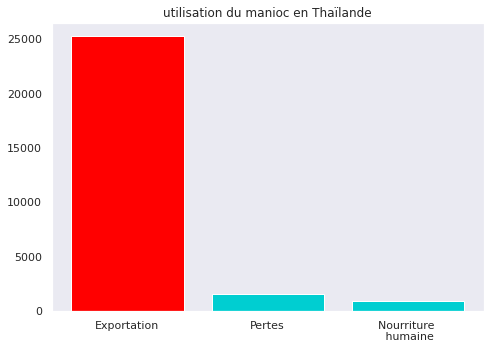

In [18]:

#mini dataframe Manioc Thaïlande
thai_manioc_query = pop_dispo.query("Zone == 'Thaïlande' & Produit == 'Manioc'")

#mini dataframe sous nutri thailande 2017 repris dataframe filtre de la Question 5
thai_sous_nutri_query = Q5.query("Zone == 'Thaïlande'")

#proportion de la population en sous nutrition
proportion_sousnutri_thailande = round(thai_sous_nutri_query.at[1114,'proportion'],2)

#affichage en mode texte de la sous nutrition en thaïlande
print("La proportion de la population en sous-nutrition de la Thaïlande est de",proportion_sousnutri_thailande,"%")

#utilisation du manioc 

#préparation barplot

maniocfig = plt.figure()
ax = maniocfig.add_axes([0,0,1,1])

valeur = [thai_manioc_query.iat[0,10],thai_manioc_query.at[13620,'Pertes'],thai_manioc_query.at[13620,'Nourriture']]
label = ['Exportation','Pertes','Nourriture \n humaine']
couleurs = ['Red','darkturquoise','darkturquoise']

ax.bar(label,valeur,color=couleurs)

plt.title(label='utilisation du manioc en Thaïlande');